In [2]:
import warnings
import numpy as np
import pandas as pd

In [3]:
warnings.filterwarnings("ignore")

In [4]:
col_names = ["user_id", "item_id", "rating", "timestamp"]
df = pd.read_csv("dataset/u.data", sep="\t", names=col_names)
df

,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596
...,...,...,...,...
99995,880,476,3,880175444
99996,716,204,5,879795543
99997,276,1090,1,874795795
99998,13,225,2,882399156


In [5]:
df["user_id"].nunique()

943

In [6]:
df["item_id"].nunique()

1682

In [7]:
movies_title = pd.read_csv("dataset/u.item.txt", sep="\|", header=None)
movies_title

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1677,1678,Mat' i syn (1997),06-Feb-1998,NaN,http://us.imdb.com/M/title-exact?Mat%27+i+syn+...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1678,1679,B. Monkey (1998),06-Feb-1998,NaN,http://us.imdb.com/M/title-exact?B%2E+Monkey+(...,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1679,1680,Sliding Doors (1998),01-Jan-1998,NaN,http://us.imdb.com/Title?Sliding+Doors+(1998),0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1680,1681,You So Crazy (1994),01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?You%20So%20Cr...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
movies_title = movies_title[[0, 1]]
movies_title.columns = ["item_id", "title"]
movies_title

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)
...,...,...
1677,1678,Mat' i syn (1997)
1678,1679,B. Monkey (1998)
1679,1680,Sliding Doors (1998)
1680,1681,You So Crazy (1994)


In [9]:
df = pd.merge(df, movies_title, on="item_id")

In [10]:
df.tail()

,user_id,item_id,rating,timestamp,title
99995,840,1674,4,891211682,Mamma Roma (1962)
99996,655,1640,3,888474646,"Eighth Day, The (1996)"
99997,655,1637,3,888984255,Girls Town (1996)
99998,655,1630,3,887428735,"Silence of the Palace, The (Saimt el Qusur) (1..."
99999,655,1641,3,887427810,Dadetown (1995)


# EDA

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("white")

In [12]:
ratings = pd.DataFrame(df.groupby("title").mean()["rating"])
ratings

,rating
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390
...,...
Young Guns II (1990),2.772727
"Young Poisoner's Handbook, The (1995)",3.341463
Zeus and Roxanne (1997),2.166667


In [13]:
ratings["sum(ratings)"] = pd.DataFrame(df.groupby("title").count()["rating"])
ratings.sort_values(ascending=False, by="rating")

,rating,sum(ratings)
title,,
They Made Me a Criminal (1939),5.0,1
Marlene Dietrich: Shadow and Light (1996),5.0,1
"Saint of Fort Washington, The (1993)",5.0,2
Someone Else's America (1995),5.0,1
Star Kid (1997),5.0,3
...,...,...
"Eye of Vichy, The (Oeil de Vichy, L') (1993)",1.0,1
King of New York (1990),1.0,1
Touki Bouki (Journey of the Hyena) (1973),1.0,1


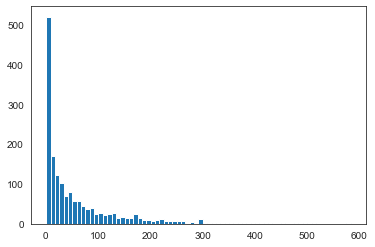

<Figure size 720x432 with 0 Axes>

In [14]:
plt.hist(ratings["sum(ratings)"], bins=70)
plt.figure(figsize=(10, 6))
plt.show()

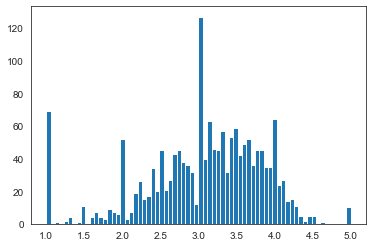

In [15]:
plt.hist(ratings["rating"], bins=70)
plt.show()

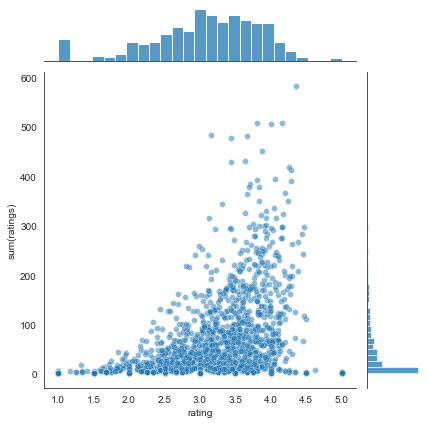

In [16]:
sns.jointplot(x="rating", y="sum(ratings)", data=ratings, alpha=0.5)

# Recommendation

In [17]:
moviemat = df.pivot_table(index="user_id", columns="title", values="rating")

In [18]:
star_war_rating = moviemat["Star Wars (1977)"]
star_war_rating

user_id
1      5.0
2      5.0
3      NaN
4      5.0
5      4.0
      ... 
939    NaN
940    4.0
941    NaN
942    5.0
943    4.0
Name: Star Wars (1977), Length: 943, dtype: float64

In [19]:
similar_to_starwars = moviemat.corrwith(star_war_rating)
corr_starwars = pd.DataFrame(similar_to_starwars, columns=["Corr"])
corr_starwars.dropna(inplace=True)

In [20]:
corr_starwars

,Corr
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398
...,...
Young Guns (1988),0.186377
Young Guns II (1990),0.228615
"Young Poisoner's Handbook, The (1995)",-0.007374


In [21]:
corr_starwars.sort_values("Corr", ascending=False)

,Corr
title,
Hollow Reed (1996),1.0
Commandments (1997),1.0
Cosi (1996),1.0
No Escape (1994),1.0
Stripes (1981),1.0
...,...
Roseanna's Grave (For Roseanna) (1997),-1.0
For Ever Mozart (1996),-1.0
American Dream (1990),-1.0


In [25]:
corr_starwars = corr_starwars.join(ratings["sum(ratings)"])

In [56]:
corr_starwars[corr_starwars["sum(ratings)"] > 100].sort_values(
    by="Corr", ascending=False
)

,Corr,sum(ratings)
title,,
Star Wars (1977),1.000000,583
"Empire Strikes Back, The (1980)",0.747981,367
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130
...,...,...
"Edge, The (1997)",-0.127167,113
As Good As It Gets (1997),-0.130466,112
Crash (1996),-0.148507,128


In [65]:
def predictor(movie_name):
    movie_userrating = moviemat[movie_name]
    similars = moviemat.corrwith(movie_userrating)
    corr_movie = pd.DataFrame(similars, columns=["corr"])
    corr_movie.dropna(inplace=True)
    corr_movie = corr_movie.join(ratings["sum(ratings)"])

    result = corr_movie[corr_movie["sum(ratings)"] > 100].sort_values(
        by="corr", ascending=False
    )
    predictions = result[result["corr"] > 0.2].sort_values(
        by="sum(ratings)", ascending=False
    )

    return predictions

In [71]:
predictor("Empire Strikes Back, The (1980)")

,corr,sum(ratings)
title,,
Star Wars (1977),0.747981,583
Return of the Jedi (1983),0.721229,507
Liar Liar (1997),0.232258,485
Toy Story (1995),0.232355,452
Raiders of the Lost Ark (1981),0.538659,420
...,...,...
"Philadelphia Story, The (1940)",0.482151,104
Young Guns (1988),0.213845,101
Pinocchio (1940),0.246031,101
